In [1]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np

# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Consistent plot size
from pylab import rcParams
rcParams['figure.figsize'] = (16,8)

# handle unwanted warnings
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# time series related imports
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima


In [2]:
# Read in data and display fist 5 rows
df = pd.read_csv('TIME SERIES + TRIPADVISORS INDEX + ECONOMIC INDEX - DATA COMPOSITION 3 (90-5-5).csv', index_col="Month", parse_dates=True)
df.head()

,Tourist Arrival,Number of Posts,Number of Comments,CCI,PMI,REERI,Class
Month,,,,,,,
2008-01-01,399556,403,3049,98.4,53.3,109,Train
2008-01-02,411032,357,3211,90.8,53.0,108,Train
2008-01-03,414332,344,3153,89.5,53.4,106,Train
2008-01-04,395900,338,3184,82.6,56.4,106,Train
2008-01-05,366387,369,2964,79.8,57.2,106,Train


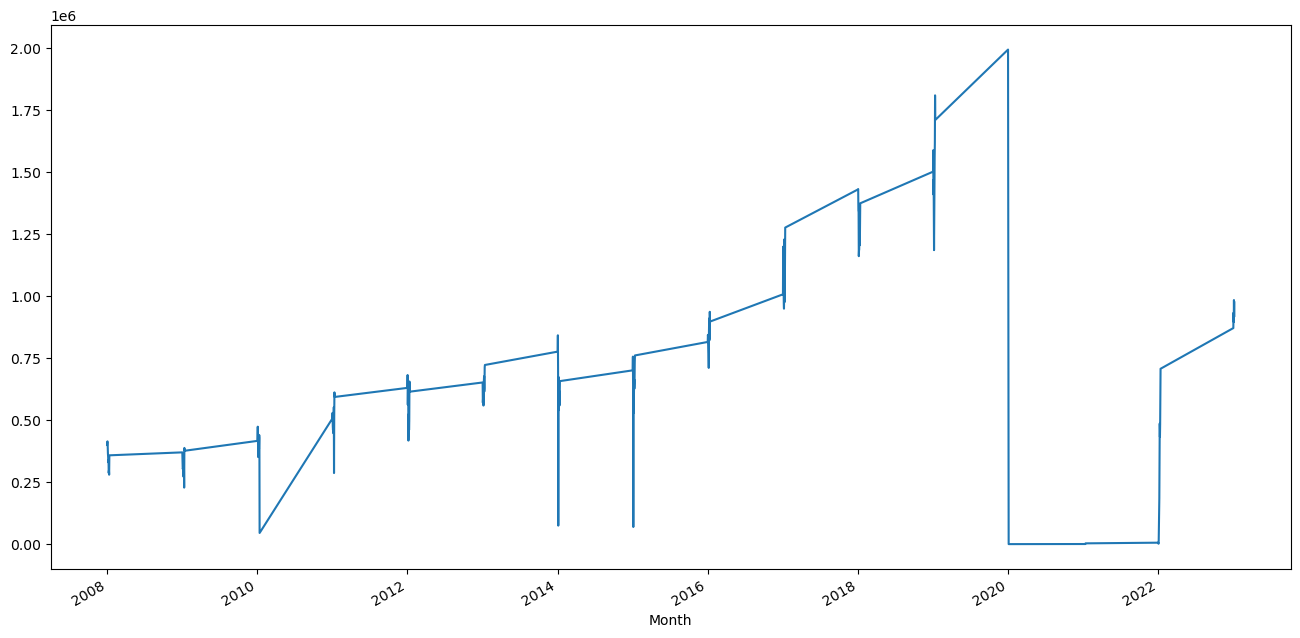

In [3]:
fig, ax = plt.subplots(figsize=(16,8))
ax = df['Tourist Arrival'].plot()
color_arr = ['g', 'r', 'm', 'b', 'y', 'k']
c_indx = 0
for x in df[df['Tourist Arrival']==1].index:
    ax.axvline(x=x, color=color_arr[c_indx], linewidth=0.5)
    if color_arr[c_indx] == 'k':
        c_indx = 0
    else:
        c_indx +=1

In [4]:
df1=df.drop(["Class"], axis=1)
print(df1)

            Tourist Arrival  Number of Posts  Number of Comments   CCI   PMI  \
Month                                                                          
2008-01-01           399556              403                3049  98.4  53.3   
2008-01-02           411032              357                3211  90.8  53.0   
2008-01-03           414332              344                3153  89.5  53.4   
2008-01-04           395900              338                3184  82.6  56.4   
2008-01-05           366387              369                2964  79.8  57.2   
...                     ...              ...                 ...   ...   ...   
2023-01-02           932969              481                3576  87.0  51.2   
2023-01-03           895425              543                4058  82.0  47.7   
2023-01-04           984146              422                3135  83.5  46.7   
2023-01-05           916257              347                2609  79.2  45.3   
2023-01-06           975010             

In [5]:
auto_arima(df1['Tourist Arrival'], m=12, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.15 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4947.042, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=4937.754, Time=0.10 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=4938.437, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4945.121, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=4948.808, Time=0.05 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=4939.754, Time=0.24 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=4939.754, Time=0.23 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=4938.184, Time=0.07 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=4940.975, Time=0.43 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=4935.707, Time=0.07 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=4937.707, Time=0.15 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=4937.707, Time=0.16 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=4936.131, Time=0.05 sec
 ARIMA(0,1,0)(2,0,1)[12]

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(1, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [6]:
train = df1['Tourist Arrival'][:'01/12/2021'].dropna()
test = df1['Tourist Arrival']['01/01/2022':].dropna()
exog_train = df1.drop(['Tourist Arrival'], axis=1)[:'01/12/2021'].dropna()
exog_test = df1.drop(['Tourist Arrival'], axis=1)['01/01/2022':].dropna()

In [7]:
import statsmodels.api as sm
model = SARIMAX(train,order=(0,1,0),seasonal_order=(1,0,0,12),exog = exog_train,
                                enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()
results.summary()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22998D+01    |proj g|=  2.56196D-04

At iterate    5    f=  1.22980D+01    |proj g|=  1.32486D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      9     11      1     0     0   2.622D-05   1.230D+01
  F =   12.297847490455494     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                    Tourist Arrival   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 0, 0, 12)   Log Likelihood               -2066.038
Date:                            Wed, 23 Aug 2023   AIC                           4146.077
Time:                                    21:03:38   BIC                           4167.381
Sample:                                         0   HQIC                          4154.730
                                            - 168                                         
Covariance Type:                              opg                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Number of Posts      321.3346    285.140      1.127      0.260    -237.529     880.198
Number of Comments    31.7367     39.529      0.803      0.422     -45.739     109.213
CCI                  239.2087   2890.329      0.083      0.934   -5425.733    5904.150
PMI                -1267.2282   3787.741     -0.335      0.738   -8691.065    6156.608
REERI              -1.295e+04   8073.164     -1.604      0.109   -2.88e+04    2871.209
ar.S.L12               0.3353      0.058      5.764      0.000       0.221       0.449
sigma2              2.223e+10      0.004   5.89e+12      0.000    2.22e+10    2.22e+10
===================================================================================
Ljung-Box (L1) (Q):                   2.69   Jarque-Bera (JB):               247.98
Prob(Q):                              0.10   Prob(JB):                         0.00
Heteroskedasticity (H):               2.25   Skew:                            -0.82
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.51e+28. Standard errors may be unstable.
"""

In [8]:
start = len(train)
end = len(train) + len(test) - 1
y_pred = results.predict(start=start,end=end, exog = exog_test, dynamic=False).rename('SARIMA(0,1,0)(1,0,[0],12) Predictions')

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [9]:
from math import sqrt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error

In [10]:
RMSE = np.sqrt(mean_squared_error(test, y_pred))
print("Root Mean Squared Error:", RMSE)

Root Mean Squared Error: 442305.3954166689


In [11]:
MAE = mean_absolute_error(test, y_pred)
print("Mean Absolute Error:", MAE)

Mean Absolute Error: 358205.85116817284


In [12]:
MAPE = mean_absolute_percentage_error(test, y_pred)
print("Mean Absolute Percentage Error:", MAPE)

Mean Absolute Percentage Error: 3.682959089436414


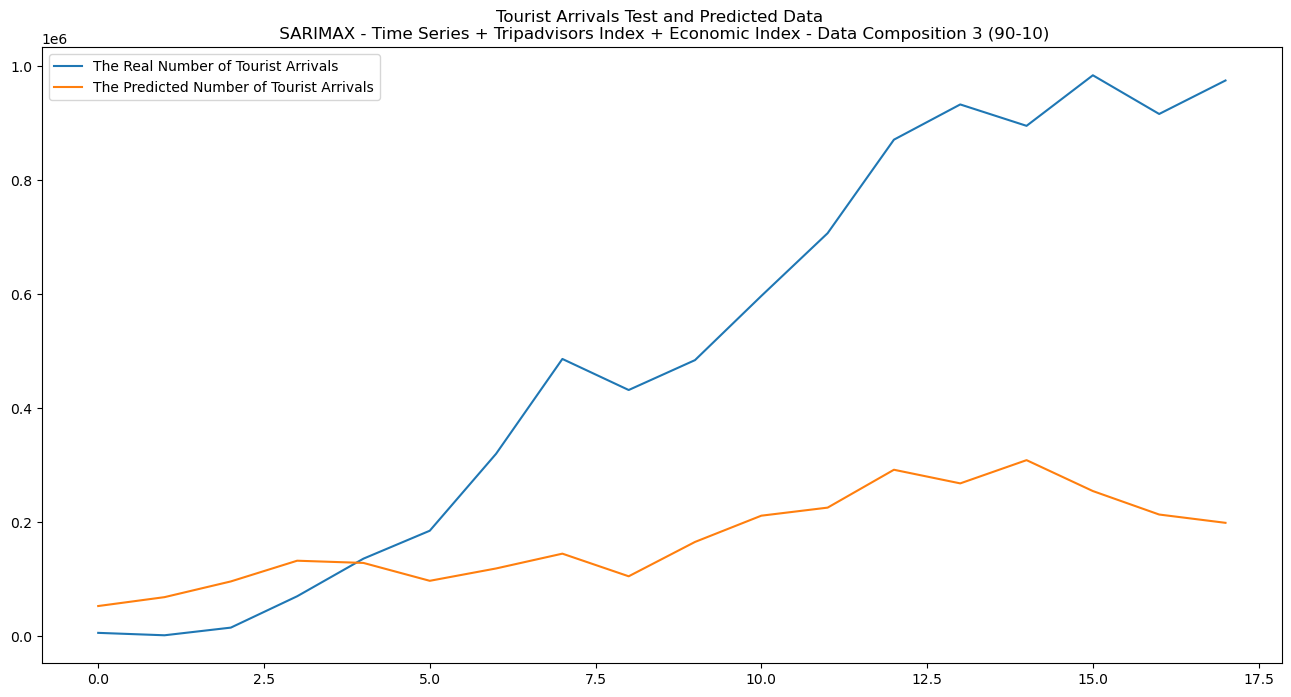

In [13]:
x_ax = range(len(test))
plt.plot(x_ax, test, label="The Real Number of Tourist Arrivals")
plt.plot(x_ax, y_pred, label="The Predicted Number of Tourist Arrivals")
plt.title("Tourist Arrivals Test and Predicted Data \n SARIMAX - Time Series + Tripadvisors Index + Economic Index - Data Composition 3 (90-10)")
plt.legend()
plt.show()